# 01 - Data Preprocessing & Cleaning

This notebook performs data loading, cleaning, encoding, scaling, and exploratory analysis on the **Cleveland Heart Disease Dataset**.

### Steps:
- Load the dataset
- Handle missing values
- Encode categorical features
- Scale numeric features
- Perform Exploratory Data Analysis (EDA)
- Export cleaned data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Step 1: Load Dataset
Load the Cleveland dataset and assign proper column names.


In [ ]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]

df = pd.read_csv('heart+disease/processed.cleveland.data', names=columns)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Step 2: Handle Missing Values
Replace '?' with NaN, convert columns to numeric, and drop or impute missing data.


In [ ]:
df.replace('?', np.nan, inplace=True)

df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

df.dropna(inplace=True)

df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Step 3: Transform Target Variable
Convert target into binary classification:  
- 0 = no heart disease  
- 1 = has heart disease


In [17]:
df['target'] = df['target'].astype(int)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


## Step 4: One-Hot Encode Categorical Features
We'll encode:
- cp
- restecg
- slope
- thal


In [18]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## Step 5: Feature Scaling
Use StandardScaler for numerical features.


In [19]:
scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


## Step 6: Cleaned Dataset Summary


In [20]:
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (297, 19)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,-0.721976,0,False,False,False,False,True,False,True,True,False
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,2.478425,1,False,False,True,False,True,True,False,False,False
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1.411625,1,False,False,True,False,True,True,False,False,True
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,-0.721976,0,False,True,False,False,False,False,True,False,False
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,-0.721976,0,True,False,False,False,True,False,False,False,False


## Step 7: Save Cleaned Data
Export cleaned dataset to CSV for next steps.


In [21]:
df.to_csv('data/heart_disease.csv', index=False)


## Step 8: Exploratory Data Analysis (EDA)
Check distributions, correlations, and outliers.


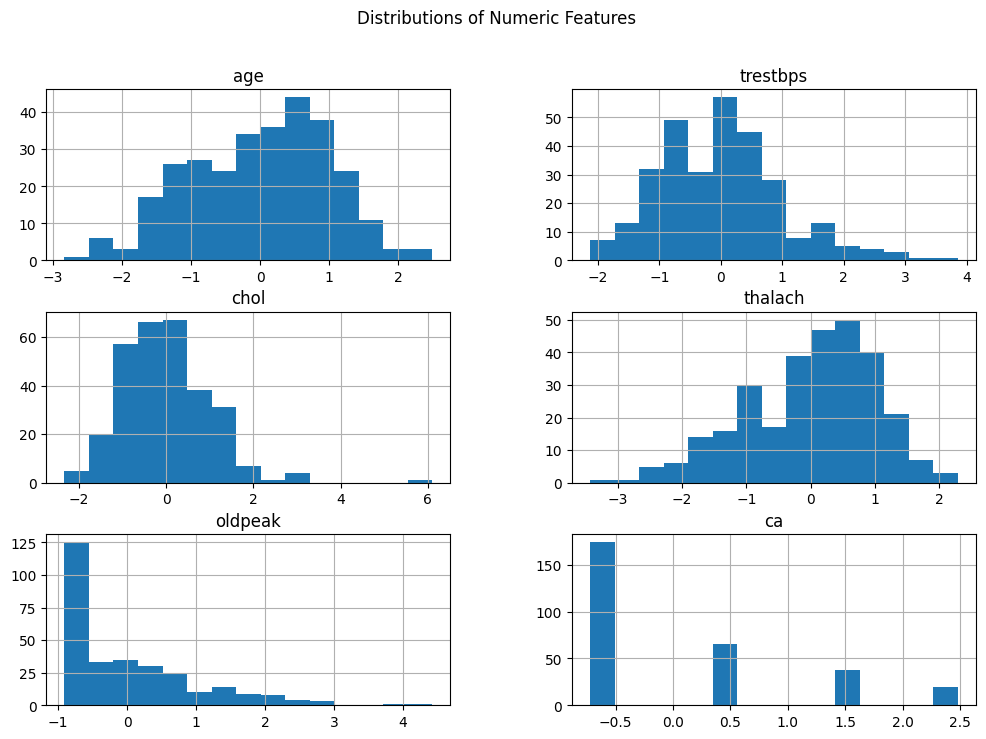

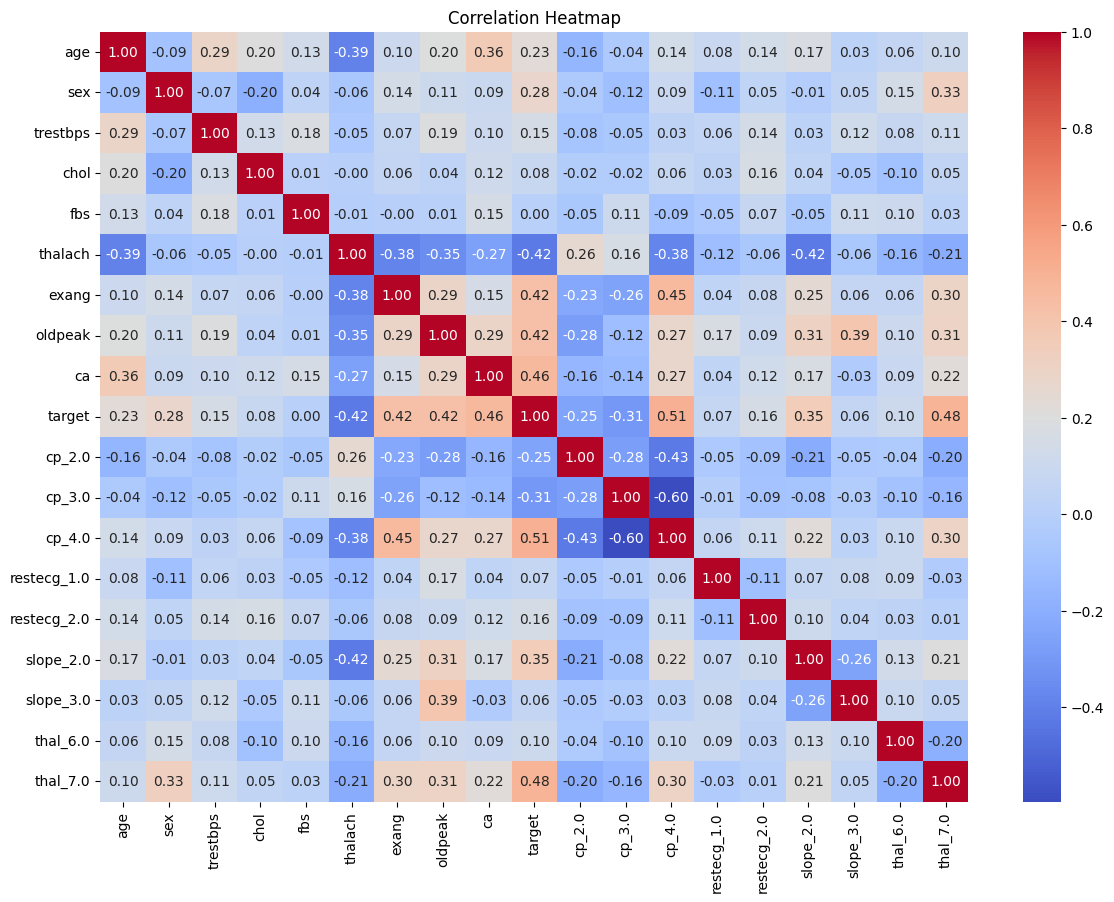

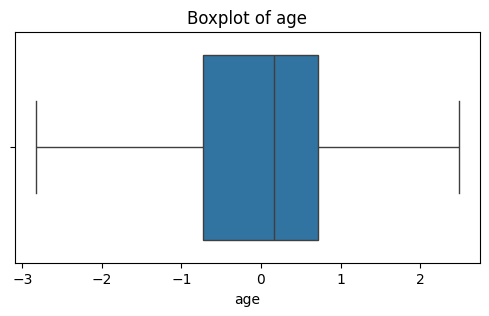

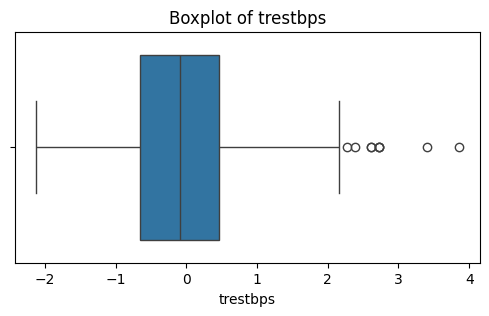

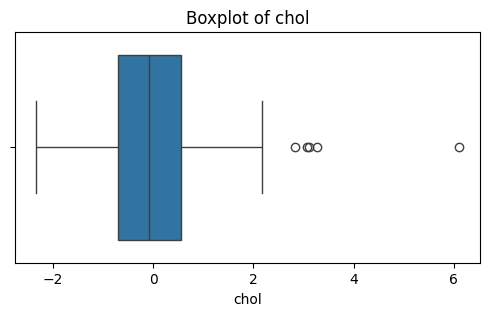

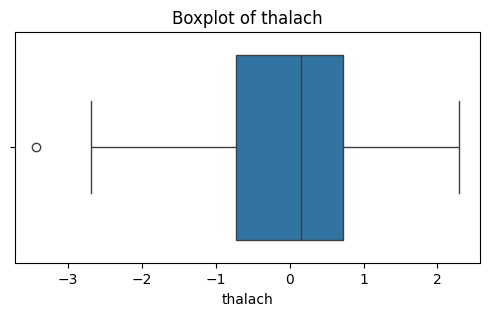

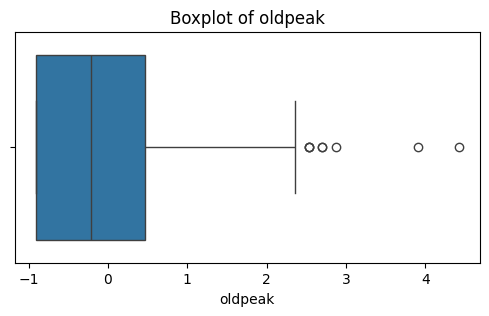

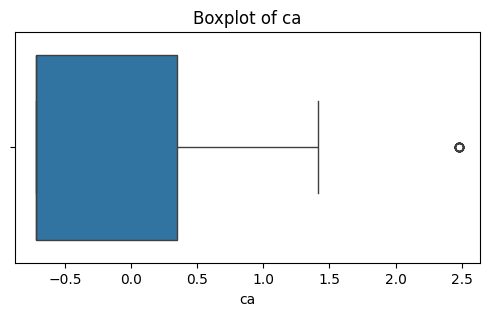

In [ ]:
df[numeric_cols].hist(bins=15, figsize=(12, 8))
plt.suptitle("Distributions of Numeric Features")
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
